# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [18]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 80.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 85.2 MB/s eta 0:00:00
  DEPRECATION: Building 'bokeh' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'bokeh'. Discussion can be found at https://github.com/pypa/pip/issues/6334
ERROR: Operation cancelled by user
^C
^C


### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "username"
kaggle_key = "Key"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [15]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 257MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

ModuleNotFoundError: No module named 'autogluon'

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [29]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [30]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
label = 'count'

predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data=train[features + [label]],
    time_limit=600,
    presets="best_quality"
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250607_070102"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.49 GB / 12.67 GB (82.8%)
Disk Space Avail:   64.81 GB / 107.72 GB (60.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

### Review AutoGluon's training run with ranking of models that did the best.

In [31]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -140.588624  root_mean_squared_error       9.177300  435.612124                0.000736           0.044561            3       True         13
1        LightGBMXT_BAG_L2 -141.315622  root_mean_squared_error       7.825176  338.234137                0.440796          51.618905            2       True         10
2          LightGBM_BAG_L2 -141.580286  root_mean_squared_error       7.673244  329.998566                0.288864          43.383333            2       True         11
3      WeightedEnsemble_L2 -141.859087  root_mean_squared_error       6.210871  276.464716                0.000782           0.043370            2       True          9
4   RandomForestMSE_BAG_L2 -142.395457  root_mean_squared_error       8.446904  340.565325   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': np.float64(-160.51746660830347),
  'KNeighborsDist_BAG_L1': np.float64(-169.6546353414388),
  'LightGBMXT_BAG_L1': np.float64(-145.56484674145977),
  'LightGBM_BAG_L1': np.float64(-144.55462457563883),
  'RandomForestMSE_BAG_L1': np.float64(

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    129.087891
1     65.416115
2     65.416115
3     76.882263
4     76.882263
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      190.470078
std       110.511856
min        18.709053
25%       105.284744
50%       161.665344
75%       264.405457
max       617.367432
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
(predictions < 0).sum()

0

In [ ]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!pip install kaggle

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 794kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                        description           status                     publicScore  privateScore  
--------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission.csv  2025-06-06 21:24:44.837000  first raw submission  SubmissionStatus.COMPLETE  1.32230      1.32230       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

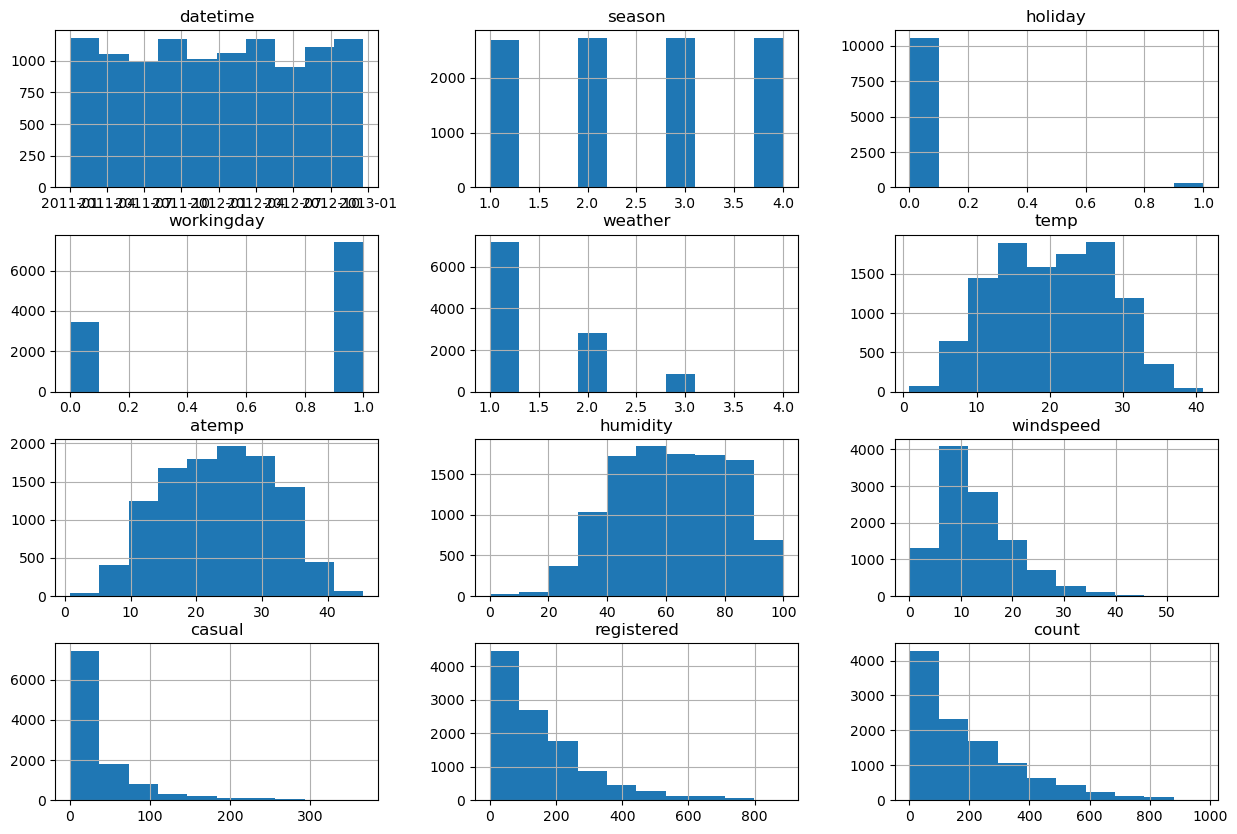

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15, 10))

In [14]:
# create a new feature
train["hour"] = train["datetime"].dt.hour
test["hour"] = test["datetime"].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >]], dtype=object)

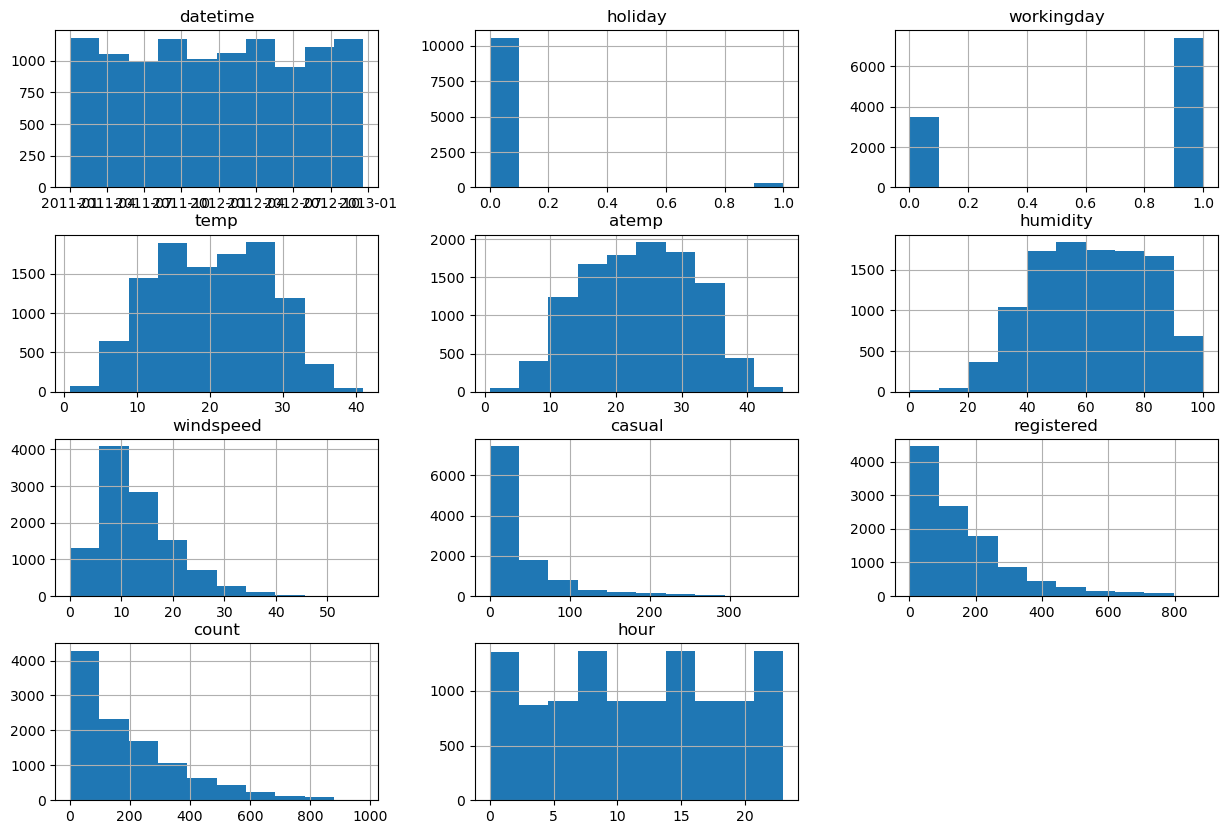

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15, 10))

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed','hour']
label = 'count'

predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data=train[features + [label]],
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250606_213038"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue May 6 04:10:50 UTC 2025
CPU Count:          2
Memory Avail:       1.02 GB / 3.76 GB (27.1%)
Disk Space Avail:   4.08 GB / 4.99 GB (81.7%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to ident

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -63.444587  root_mean_squared_error      12.573111  369.042459                0.000579           0.033398            3       True         14
1      WeightedEnsemble_L2  -63.734184  root_mean_squared_error      10.471033  252.527672                0.000821           0.041893            2       True          9
2          CatBoost_BAG_L2  -64.012172  root_mean_squared_error      11.885252  331.121641                0.163099          31.441016            2       True         13
3        LightGBMXT_BAG_L1  -64.565891  root_mean_squared_error       7.390435   48.986572                7.390435          48.986572            1       True          3
4   RandomForestMSE_BAG_L2  -64.598253  root_mean_squared_error      12.409433  337.568045   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -124.76825428589918,
  'KNeighborsDist_BAG_L1': -125.61769498064501,
  'LightGBMXT_BAG_L1': -64.56589067040215,
  'LightGBM_BAG_L1': -65.67725376948735,
  'RandomForestMSE_BAG_L1': -69.55

In [ ]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features[predictions_new_features < 0] = 0

In [ ]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 721kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-06-06 21:48:34.597000  new features          SubmissionStatus.COMPLETE  0.53800      0.53800       
submission.csv               2025-06-06 21:24:44.837000  first raw submission  SubmissionStatus.COMPLETE  1.32230      1.32230       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [15]:
hyperparameters = {
    'GBM': [{'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 50, 'extra_trees': True},
        {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31} ],
    'RF': [{'criterion': 'squared_error', 'n_estimators': 250, 'max_depth': 30, 'min_samples_leaf': 3}],
    'CAT': {}
}
predictor_new_hpo = TabularPredictor(
    label=label,
    eval_metric="root_mean_squared_error"
).fit(
    train_data=train[features + [label]],
    time_limit=600,
    hyperparameters=hyperparameters,
    presets="best_quality",
    hyperparameter_tune_kwargs={'num_trials': 5, 'scheduler': 'local', 'searcher': 'random'}
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250607_064820"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.31 GB / 12.67 GB (89.3%)
Disk Space Avail:   64.99 GB / 107.72 GB (60.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-78.7711	 = Validation score   (-root_mean_squared_error)
	38.12s	 = Training   runtime
	0.38s	 = Validation runtime
Hyperparameter tuning model: LightGBM_2_BAG_L1 ... Tuning model for up to 63.19s of the 380.01s of remaining time.


  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_2_BAG_L1/T1 ...
	-67.9391	 = Validation score   (-root_mean_squared_error)
	36.87s	 = Training   runtime
	0.16s	 = Validation runtime
Hyperparameter tuning model: RandomForest_BAG_L1 ... Tuning model for up to 63.19s of the 343.05s of remaining time.
	No hyperparameter search space specified for RandomForest_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
Fitted model: RandomForest_BAG_L1 ...
	-69.5358	 = Validation score   (-root_mean_squared_error)
	9.91s	 = Tra

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=3.57%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	-65.2391	 = Validation score   (-root_mean_squared_error)
	63.64s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 269.41s of remaining time.
	Ensemble Weights: {'CatBoost_BAG_L1/T1': 0.826, 'RandomForest_BAG_L1': 0.174}
	-65.0321	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 4 L2 models, fit_strategy="sequential" ...
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 60.61s of the 269.36s of remaining time.


  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-65.9499	 = Validation score   (-root_mean_squared_error)
	40.81s	 = Training   runtime
	0.44s	 = Validation runtime
Hyperparameter tuning model: LightGBM_2_BAG_L2 ... Tuning model for up to 60.61s of the 228.46s of remaining time.


  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_2_BAG_L2/T1 ...
	-65.992	 = Validation score   (-root_mean_squared_error)
	38.13s	 = Training   runtime
	0.09s	 = Validation runtime
Hyperparameter tuning model: RandomForest_BAG_L2 ... Tuning model for up to 60.61s of the 190.23s of remaining time.
	No hyperparameter search space specified for RandomForest_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
Fitted model: RandomForest_BAG_L2 ...
	-66.2225	 = Validation score   (-root_mean_squared_error)
	23.02s	 = Tra

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=3.61%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	-65.2542	 = Validation score   (-root_mean_squared_error)
	47.3s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.00s of the 119.78s of remaining time.
	Ensemble Weights: {'CatBoost_BAG_L1/T1': 0.458, 'CatBoost_BAG_L2/T1': 0.333, 'RandomForest_BAG_L2': 0.167, 'RandomForest_BAG_L1': 0.042}
	-64.6964	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 301.81s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 1466.2 rows/s (1361 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250607_064820")


In [16]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3 -64.696378  root_mean_squared_error       2.038599  218.886300                0.000653           0.030541            3       True         10
1   WeightedEnsemble_L2 -65.032088  root_mean_squared_error       0.708845   73.569071                0.002883           0.019635            2       True          5
2    CatBoost_BAG_L1/T1 -65.239115  root_mean_squared_error       0.177404   63.638152                0.177404          63.638152            1       True          4
3    CatBoost_BAG_L2/T1 -65.254187  root_mean_squared_error       1.298135  195.836458                0.058502          47.295369            2       True          9
4    LightGBM_BAG_L2/T1 -65.949941  root_mean_squared_error       1.684214  189.355406                0.444581   

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_2_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_2_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': np.float64(-78.77108298678559),
  'LightGBM_2_BAG_L1/T1': np.float64(-67.93912019020806),
  'RandomForest_BAG_L1': np.float64(-69.53584300666837),
  'CatBoost_BAG_L1/T1': np.float64(-65.23911472353633),
  'WeightedEnsemble_L2': np.float64(-65.03208817962184),
  'LightGBM_BAG_L2/T1': np.float64(-65.94994118247487),
  'LightGBM_2_BAG_L2/T1': np.float64(-65.99198111644628),
  'RandomForest_BAG_L2': np.float64

In [17]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [20]:
# Same submitting predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [21]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 1.03MB/s]
Successfully submitted to Bike Sharing Demand

In [22]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-06-07 06:57:30.633000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.55053      0.55053       
submission_new_hpo.csv       2025-06-06 22:07:28.317000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.54318      0.54318       
submission_new_features.csv  2025-06-06 21:48:34.597000  new features                       SubmissionStatus.COMPLETE  0.53800      0.53800       
submission.csv               2025-06-06 21:24:44.837000  first raw submission               SubmissionStatus.COMPLETE  1.32230      1.32230       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [32]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-140.588624,root_mean_squared_error,9.177300,435.612124,0.000736,0.044561,3,True,13
1,LightGBMXT_BAG_L2,-141.315622,root_mean_squared_error,7.825176,338.234137,0.440796,51.618905,2,True,10
2,LightGBM_BAG_L2,-141.580286,root_mean_squared_error,7.673244,329.998566,0.288864,43.383333,2,True,11
3,WeightedEnsemble_L2,-141.859087,root_mean_squared_error,6.210871,276.464716,0.000782,0.043370,2,True,9
4,RandomForestMSE_BAG_L2,-142.395457,root_mean_squared_error,8.446904,340.565325,1.062524,53.950092,2,True,12
5,CatBoost_BAG_L1,-144.258674,root_mean_squared_error,0.081292,62.469948,0.081292,62.469948,1,True,6
6,LightGBM_BAG_L1,-144.554625,root_mean_squared_error,0.578764,39.824461,0.578764,39.824461,1,True,4
7,LightGBMXT_BAG_L1,-145.564847,root_mean_squared_error,4.094755,58.456852,4.094755,58.456852,1,True,3
8,NeuralNetFastAI_BAG_L1,-146.435981,root_mean_squared_error,0.424964,109.444222,0.424964,109.444222,1,True,8
9,ExtraTreesMSE_BAG_L1,-149.637623,root_mean_squared_error,1.030315,6.225863,1.030315,6.225863,1,True,7


In [ ]:
predictor_new_features.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-63.444587,root_mean_squared_error,12.573111,369.042459,0.000579,0.033398,3,True,14
1,WeightedEnsemble_L2,-63.734184,root_mean_squared_error,10.471033,252.527672,0.000821,0.041893,2,True,9
2,CatBoost_BAG_L2,-64.012172,root_mean_squared_error,11.885252,331.121641,0.163099,31.441016,2,True,13
3,LightGBMXT_BAG_L1,-64.565891,root_mean_squared_error,7.390435,48.986572,7.390435,48.986572,1,True,3
4,RandomForestMSE_BAG_L2,-64.598253,root_mean_squared_error,12.409433,337.568045,0.687280,37.887420,2,True,12
5,LightGBMXT_BAG_L2,-64.662873,root_mean_squared_error,11.953212,321.654086,0.231060,21.973461,2,True,10
6,LightGBM_BAG_L2,-64.958266,root_mean_squared_error,11.821285,320.939672,0.099133,21.259047,2,True,11
7,CatBoost_BAG_L1,-65.507561,root_mean_squared_error,0.303563,166.143603,0.303563,166.143603,1,True,6
8,LightGBM_BAG_L1,-65.677254,root_mean_squared_error,2.039521,26.997139,2.039521,26.997139,1,True,4
9,ExtraTreesMSE_BAG_L1,-69.107305,root_mean_squared_error,0.646648,6.265436,0.646648,6.265436,1,True,7


In [24]:
predictor_new_hpo.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-64.696378,root_mean_squared_error,2.038599,218.886300,0.000653,0.030541,3,True,10
1,WeightedEnsemble_L2,-65.032088,root_mean_squared_error,0.708845,73.569071,0.002883,0.019635,2,True,5
2,CatBoost_BAG_L1/T1,-65.239115,root_mean_squared_error,0.177404,63.638152,0.177404,63.638152,1,True,4
3,CatBoost_BAG_L2/T1,-65.254187,root_mean_squared_error,1.298135,195.836458,0.058502,47.295369,2,True,9
4,LightGBM_BAG_L2/T1,-65.949941,root_mean_squared_error,1.684214,189.355406,0.444581,40.814317,2,True,6
5,LightGBM_2_BAG_L2/T1,-65.991981,root_mean_squared_error,1.328129,186.670867,0.088496,38.129779,2,True,7
6,RandomForest_BAG_L2,-66.222497,root_mean_squared_error,1.979444,171.560390,0.739811,23.019302,2,True,8
7,LightGBM_2_BAG_L1/T1,-67.939120,root_mean_squared_error,0.157111,36.869987,0.157111,36.869987,1,True,2
8,RandomForest_BAG_L1,-69.535843,root_mean_squared_error,0.528558,9.911283,0.528558,9.911283,1,True,3
9,LightGBM_BAG_L1/T1,-78.771083,root_mean_squared_error,0.376560,38.121666,0.376560,38.121666,1,True,1


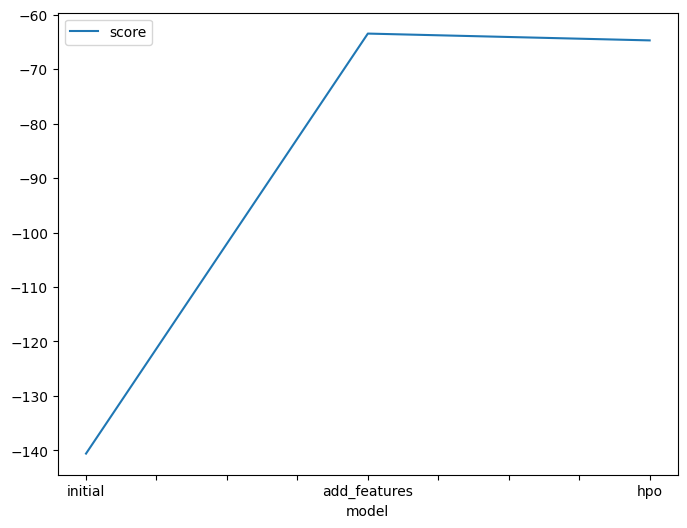

In [33]:
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-140.588624, -63.444587, -64.696378]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

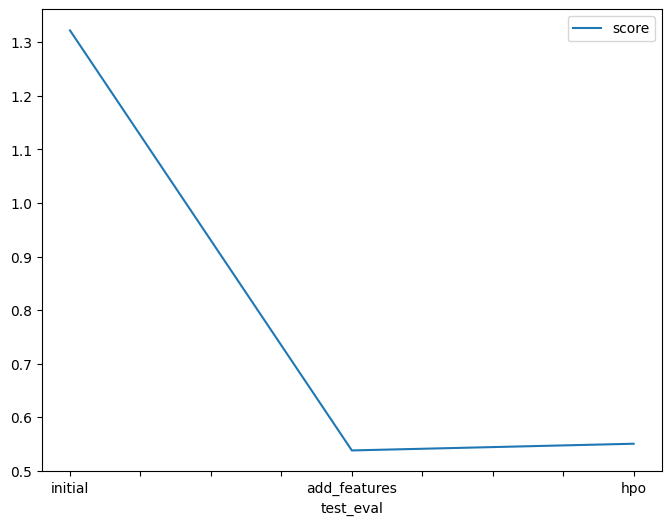

In [26]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.32230, 0.53800, 0.55053]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [28]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [-140.341672, -63.444587 , -64.696378],
    "hpo2": [-141.029454, -63.734184, -65.032088],
    "hpo3": [-141.188095, -64.012172, -65.239115],
    "score": [1.32230, 0.53800, 0.55053]
})

,model,hpo1,hpo2,hpo3,score
0,initial,-140.341672,-141.029454,-141.188095,1.32230
1,add_features,-63.444587,-63.734184,-64.012172,0.53800
2,hpo,-64.696378,-65.032088,-65.239115,0.55053
